# What's up eth ?

![ethereum gif](https://thumbs.gfycat.com/HandyFaithfulAlaskanhusky-max-1mb.gif)

## This is a mini-hackathon project to for the [dOrg](https://dorg.tech), a full-stack freelancer agency building and running on web3.

   ```The following excercise can be done with more wallets, however, as a start, by using BigQuery we have downloaded a CSV with only 16,000 rows, each row representing one wallet/address```

#### To begin, we have used Google's BigQuery to obtain the 16.000 Ethereum wallets with the highest balances on them as of June 4th, 2020. 

![biq query results](INPUT/BigQuery_02.png)

#### The idea is to do a brief exploration of the data using the common python libraries like `pandas` and `seaborn` to visualize the data, and propose a basic dashboard concept.

#### I've tried to keep simple insights describing new acquired knowledge with the :bulb: (💡) emoji

In [1]:
### Importing libraries
from web3 import Web3
import datetime, calendar
from decimal import Decimal
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

/home/rh/.local/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# 💡  New knowledge:
The library `web3` helps us deal with  data related to ethereum ~ ♠


In [2]:
df = pd.read_csv('data/top-eth-wallets-20200604-212329.csv')
df

,address,eth_balance
0,0x742d35cc6634c0532925a3b844bc454e4438f44e,3836061615941836500000001
1,0xdc76cd25977e0a5ae17155770273ad58648900d3,3125760535463887010445000
2,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,2507764425435465820651570
3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2381646713533211711872996
4,0x53d284357ec70ce289d6d64134dfac8e511c8a3d,1378754144654898911481302
...,...,...
15995,0x28c87a829b878bb3d514fd0e89ef9eec1157e4af,401104338000000000000
15996,0xf37b426547a1642d8033324814f0ede3114fc212,401100000000000000000
15997,0xf052a089a9201a8e891a094f3ac7a916d0692c39,401088811000000000000
15998,0xdb259476c3eb906b10cbaada30539181efa75901,401043968196000000000


In [3]:
df.describe()

,address,eth_balance
count,16000,16000
unique,16000,14219
top,0xac5c13da0b013a9d34dfcaa8d4017c645ef87bee,1000000000000000000000
freq,1,237


# 💡  New knowledge:
eth_balance is measured in `wei`, which is the ethereum's minimum measurement unit.
Trying to use the `wei` values will cause a `64-bit overflow error`, as seen with the first row of the dataframe
`3836061615941836500000001`


In [4]:
lowest_wallet = df.iloc[-1]
#lowest balance
lb = lowest_wallet.eth_balance
print(f"The wallet with the lowest balance has {lb} wei")
print(f"The balances in the obtained dataset are strings, {type(lb)=}")

The wallet with the lowest balance has 401037450995000000000 wei
The balances in the obtained dataset are strings, type(lb)=<class 'str'>


## Turning `wei` strings into `ether` ints

In [5]:
def wei_str_to_wei_int(wei_str):
    wei_int = int(wei_str)
    return wei_int

In [6]:
df["wei_int"] = df.eth_balance.apply(wei_str_to_wei_int)
df.head()

,address,eth_balance,wei_int
0,0x742d35cc6634c0532925a3b844bc454e4438f44e,3836061615941836500000001,3836061615941836500000001
1,0xdc76cd25977e0a5ae17155770273ad58648900d3,3125760535463887010445000,3125760535463887010445000
2,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,2507764425435465820651570,2507764425435465820651570
3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2381646713533211711872996,2381646713533211711872996
4,0x53d284357ec70ce289d6d64134dfac8e511c8a3d,1378754144654898911481302,1378754144654898911481302


In [7]:
df.wei_int.describe()

count                      16000
unique                     14219
top       1000000000000000000000
freq                         237
Name: wei_int, dtype: object

### Now that we have a column with `int` values, we can turn it into `ether`

In [8]:
# Can we calculate how much ether is there in the top ethereum wallet?
highest_wallet_balance = df.wei_int.iloc[0]
max_ether_balance = Web3.fromWei(highest_wallet_balance, 'ether')
print(f"{max_ether_balance=}")
print(f"{type(max_ether_balance)=}")

max_ether_balance=Decimal('3836061.615941836500000001')
type(max_ether_balance)=<class 'decimal.Decimal'>


# Creating an ether column

In [9]:
wei_int_to_eth_dec = lambda wei_int : Web3.fromWei(wei_int, 'ether')
df['ether'] = df.wei_int.apply(wei_int_to_eth_dec)

### Plotting the column

In [10]:
df.ether

0        3836061.615941836500000001
1           3125760.535463887010445
2         2507764.42543546582065157
3        2381646.713533211711872996
4        1378754.144654898911481302
                    ...            
15995                    401.104338
15996                         401.1
15997                    401.088811
15998                 401.043968196
15999                 401.037450995
Name: ether, Length: 16000, dtype: object

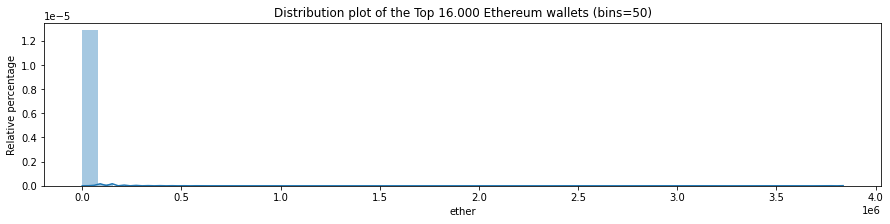

In [11]:
bins=50
f,a = plt.subplots(figsize=(15,3))
a.set_title(f'Distribution plot of the Top 16.000 Ethereum wallets ({bins=})')
a.set_ylabel('Relative percentage')
a.set_xlabel('Amount of ether in the wallet')
sns.distplot(df.ether, ax=a, bins=bins)

# 💡 This first plot is not very helpful, because there is a huge difference between the wallet with the highest balance and the wallets with the lowest balances

To have a better insight on the data, we will try reducing the number of bins in the distribution plot, and ploting a taller graph.

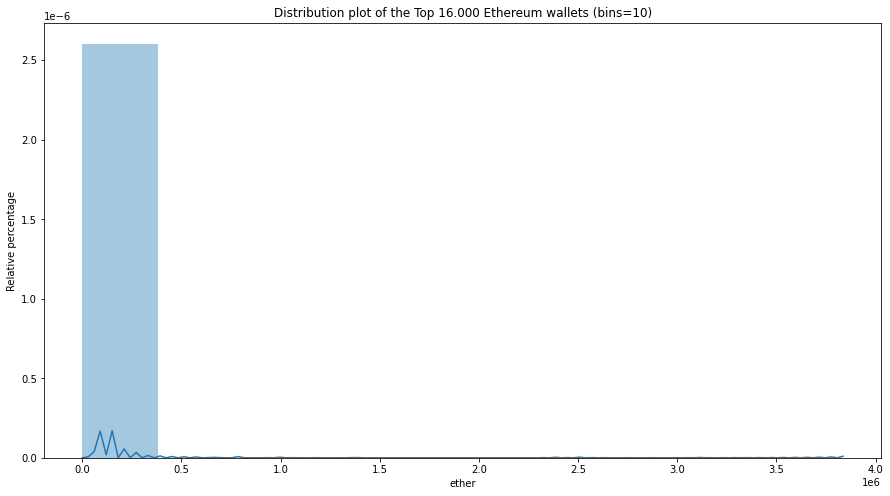

In [12]:
bins = 10
f,a = plt.subplots(figsize=(15,8))
a.set_title(f'Distribution plot of the Top 16.000 Ethereum wallets ({bins=})')
a.set_ylabel('Relative percentage')
a.set_xlabel('Amount of ether in the wallet')
sns.distplot(df.ether, ax=a, bins=bins)

## That's not helping much is it? 
The distribution is very skewed to the left. And our graph cannot represent the data in a way the human eye can interpret it.


**What if we take the lowest `15000` wallets and plot a different number of bins; Will we see a distribution that is easier to interpret?**

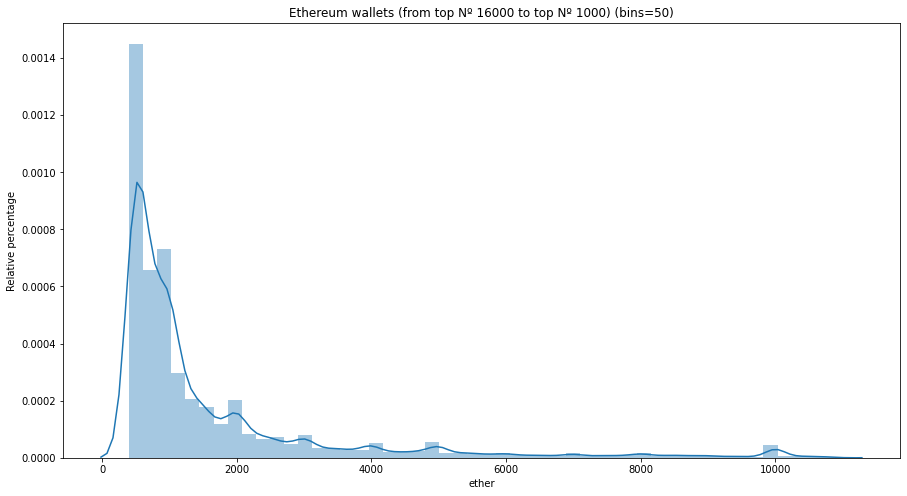

In [13]:
bins = 50
f,a = plt.subplots(figsize=(15,8))
a.set_title(f'Ethereum wallets (from top Nº 16000 to top Nº 1000) ({bins=})')
a.set_ylabel('Relative percentage')
a.set_xlabel('Amount of ether in the wallet')
sns.distplot(df.ether.iloc[-15000:], ax=a, bins=bins)

### Now that is looking better :)
This is something we can work with a little bit more.

## 💡 New knowlegde acquired: 
When considering the top `16000` ethereum balances, the top `1000` wallets in hold so much `ether` when compared to the other `15000`. Although this is somewhat expected, because wealth is not equally distributed, the gap is still quite interesting to see graphically!

###  Next steps to consider tomorrow?
- **Option A**: Look into these top wallets, and use a scatter plot to compare their balance to their level of activity in recent days.
- **Option B**: Dig further into other wallets with lower balances (check the next 16.000 rows in BigQuery, and add more data to this dataset.) 

Good night...!

![morning](https://66.media.tumblr.com/e1f1d1ca2135011d743de541f0879db5/tumblr_p6uolv1jXa1wt4b1zo1_400.gifv)

Aaand we're back!

**A new day, a new query!**

After talking with some members of dOrg, we will continue with the path mentioned in OptionA.



# Option A: Include a second variable (transactions)
The BigQuery public database also includes a table with all the previous transactions made by the different addressess.

Once again, we will leverage on the power of BigQuery to obtain some material data on our top 16k addresses.


## 💡 New knowledge: `BigQuery Pricing`
- **When running a query, you are charged for the computing power, even if the query is stopped halfway through...**

- The first 1 TB of query data processed per month is free.

- Each additional 1 TB of queries costs $5 to run



#### Here is the new experimental query, which uses an `inner join` to include the transactions these top wallets have made in the past.

***As you can see in the following image, this query used up over 300GB of our free monthly quota, as this is just the first time using BigQuery for me, we should not dwell on the fact that we've used up a lot of our free monthly quota. We are learnign a lot in just a couple of hours of tinkering :')***

![joining top wallets with their transactions](INPUT/BigQuery_03.png)

#### This time, we were able to export more rows from the query, by exporting it to google drive. Now we should have 50000 rows in our new dataset


In [14]:
!ls data

top-eth-wallets-20200604-212329.csv
top-eth-wallets-transactions-20200605-135001-xw8bnmgvf5di.csv


In [15]:
txs = pd.read_csv('data/top-eth-wallets-transactions-20200605-135001-xw8bnmgvf5di.csv')

/home/rh/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
# Checking the dataframe
txs.tail()

,address,eth_balance,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash
49995,0xa7efae728d2936e78bda97dc267687568dd593f3,232721710624079986020000,0x2896fdf3df8f3944cdbbe49bbcdbf2fabc8d4d73b5bc...,97835,13,0xa7efae728d2936e78bda97dc267687568dd593f3,0xabdbba4bc1b993a5ed89057d931e02c661dcfd2b,30000000000000000000,210000,50000000000,0x,637497,21000,NaN,NaN,1.0,2020-05-22 23:20:42 UTC,10118546,0xdeedec78fb76176d17c071648382aeca36e112991b76...
49996,0xa7efae728d2936e78bda97dc267687568dd593f3,232721710624079986020000,0x31e23a1a9eef89a4fbac6f8b8e460b2585b17dfd6816...,97791,5,0xa7efae728d2936e78bda97dc267687568dd593f3,0xe9a428cfdcf3bfefaa81f047529e4bddf058ae65,600000000000000000,210000,50000000000,0x,126000,21000,NaN,NaN,1.0,2020-05-22 16:42:40 UTC,10116751,0xe503705a80a78626e21e351389f82f190877a989d11d...
49997,0xa7efae728d2936e78bda97dc267687568dd593f3,232721710624079986020000,0x185fac53c4291dfcee98e44a20fdb80ab455e3151829...,97581,37,0xa7efae728d2936e78bda97dc267687568dd593f3,0x912cc72659ada24873aea208080dae7b0eb61c4f,4994000000000000000,210000,50000000000,0x,1007532,21000,NaN,NaN,1.0,2020-05-22 05:53:55 UTC,10113934,0xe51a1668893e9b6ff0cc633ba4a2f51d8df06ce407c0...
49998,0xa7efae728d2936e78bda97dc267687568dd593f3,232721710624079986020000,0xad6327075a952d0d0a574805c1b150de545237d292d0...,2093,52,0xa7efae728d2936e78bda97dc267687568dd593f3,0xe202fc82130fd31f5f655446b783b9a27c49b3c1,7100000000000000000,420000,35000000000,0x,1926550,21000,NaN,NaN,1.0,2019-10-16 08:03:30 UTC,8751022,0xcc67b6a63fe884bfbd6374246dd18884f2707327002d...
49999,0xa7efae728d2936e78bda97dc267687568dd593f3,232721710624079986020000,0xfb81dcd80f0a9136eb662ac70443a7c154f7a511060d...,97823,8,0xa7efae728d2936e78bda97dc267687568dd593f3,0x95c7887f349b897152faa4a79207b58b0c8dcaca,4490000000000000000,210000,50000000000,0x,262786,21000,NaN,NaN,1.0,2020-05-22 19:28:22 UTC,10117515,0x6885247b1fda4ed5d33d10f4c895cb66f05c6192946f...


In [17]:
# check the columns in our dataframe
txs.columns

Index(['address', 'eth_balance', 'hash', 'nonce', 'transaction_index',
       'from_address', 'to_address', 'value', 'gas', 'gas_price', 'input',
       'receipt_cumulative_gas_used', 'receipt_gas_used',
       'receipt_contract_address', 'receipt_root', 'receipt_status',
       'block_timestamp', 'block_number', 'block_hash'],
      dtype='object')

## It's always a good idea to perform an initial exploration of our dataset

In [18]:
#How many addresses did we retrieve from our query?
txs.address.unique()

array(['0x742d35cc6634c0532925a3b844bc454e4438f44e',
       '0xdc76cd25977e0a5ae17155770273ad58648900d3',
       '0xbe0eb53f46cd790cd13851d5eff43d12404d33e8',
       '0x53d284357ec70ce289d6d64134dfac8e511c8a3d',
       '0xe853c56864a2ebe4576a807d26fdc4a0ada51919',
       '0x66f820a414680b5bcda5eeca5dea238543f42054',
       '0x229b5c097f9b35009ca1321ad2034d4b3d5070f6',
       '0x267f70f9b856de226fea5fc1b0a8e319c72ceff5',
       '0x73bceb1cd57c711feac4224d062b0f6ff338501e',
       '0xe92d1a43df510f82c66382592a047d288f85226f',
       '0x558553d54183a8542f7832742e7b4ba9c33aa1e6',
       '0x850c0224f37f67c471e860375ac8e39fea61e8b0',
       '0xab5801a7d398351b8be11c439e05c5b3259aec9b',
       '0xca8fa8f0b631ecdb18cda619c4fc9d197c8affca',
       '0xe0f5b79ef9f748562a21d017bb7a6706954b7585',
       '0x1e2fcfd26d36183f1a5d90f0e6296915b02bcb40',
       '0x8103683202aa8da10536036edef04cdd865c225e',
       '0x189b9cbd4aff470af2c0102f365fc1823d857965',
       '0x0a4c79ce84202b03e95b7a692e5d728d83c4

#### I should have not set the limit to 50k rows in the BigQuery SQL query above, as we can see that only a few addresses were retrieved. However, this info is enough for us to continue our exploration.

In [19]:
# Which of these accounts was the most active?
txs.address.value_counts()

0xa7efae728d2936e78bda97dc267687568dd593f3    47970
0x742d35cc6634c0532925a3b844bc454e4438f44e      574
0xbe0eb53f46cd790cd13851d5eff43d12404d33e8      405
0x7d6149ad9a573a6e2ca6ebf7d4897c1b766841b4      394
0x267f70f9b856de226fea5fc1b0a8e319c72ceff5      308
0xe853c56864a2ebe4576a807d26fdc4a0ada51919       79
0x8cf23cd535a240eb0ab8667d24eedbd9eccd5cba       66
0x66f820a414680b5bcda5eeca5dea238543f42054       51
0x189b9cbd4aff470af2c0102f365fc1823d857965       44
0xdc76cd25977e0a5ae17155770273ad58648900d3       35
0xab5801a7d398351b8be11c439e05c5b3259aec9b       28
0x850c0224f37f67c471e860375ac8e39fea61e8b0       21
0x73bceb1cd57c711feac4224d062b0f6ff338501e       11
0x1e2fcfd26d36183f1a5d90f0e6296915b02bcb40        4
0x53d284357ec70ce289d6d64134dfac8e511c8a3d        3
0x8103683202aa8da10536036edef04cdd865c225e        1
0x0a4c79ce84202b03e95b7a692e5d728d83c44c76        1
0x558553d54183a8542f7832742e7b4ba9c33aa1e6        1
0xe92d1a43df510f82c66382592a047d288f85226f        1
0xca8fa8f0b6

## 💡  Top 3 most active addresses within our query `sending` ethereum: 
- [0xa7efae728d2936e78bda97dc267687568dd593f3](https://etherscan.io/address/0xa7efae728d2936e78bda97dc267687568dd593f3) with 47970 transactions
- [0x742d35cc6634c0532925a3b844bc454e4438f44e](https://etherscan.io/address/0x742d35cc6634c0532925a3b844bc454e4438f44e) with 574 transactions
- [0xbe0eb53f46cd790cd13851d5eff43d12404d33e8](https://etherscan.io/address/0xbe0eb53f46cd790cd13851d5eff43d12404d33e8) with 405 transactions

***These seem to be famous cryptocurrency exchanges.***

In [20]:
# Now, we wanted to see who received the most transactions
txs.to_address.value_counts()

0xce235362e7d11de16696fed6adad9137f9ad8ada    640
0xc9149f750fa89b6f7719c961be13660eae3c0ac1    341
0xe5782724e87bcd5a1f48737ff6cfeaf875ab5873    306
0x5f86fe0e62d1f0226f535ebe5d98a5d3edc9a615    268
0x2dc47474e1c643df56b03de646fd25c3334c4674    265
                                             ... 
0x63ade3f2196c5320b4b9752f2b9af3bc48e0d8a1      1
0x1d9afbd1840c4af0b5d433d2deaecfcadf480a99      1
0x8c8c5872b45b13fc6f5d6ac15d4e191fb83eeeb5      1
0x5311e3041a748da71356aa6d7da889a9586a0a42      1
0x3d7944e169456d26278b0c47e338d95c763039e7      1
Name: to_address, Length: 23315, dtype: int64

**By checking the addresses that received the most transactions, we can see that the wallet was the most active with 640 recorded transactions within  our 50.000 rows**
- [0xce235362e7d11de16696fed6adad9137f9ad8ada](https://etherscan.io/address/0xce235362e7d11de16696fed6adad9137f9ad8ada) 

# Which was the highest value transaction performed within our dataset?
#### Remember that the values within our dataset are representeds as strings, we have to convert them to int


***For this, we can use the function we defined yesterday in an df.column.apply, and assing the numerical value in a new column***

In [21]:
txs.value

0                              0
1                              0
2        50000000000000000000000
3                              0
4        50000000000000000000000
                  ...           
49995       30000000000000000000
49996         600000000000000000
49997        4994000000000000000
49998        7100000000000000000
49999        4490000000000000000
Name: value, Length: 50000, dtype: object

In [22]:
txs["wei_int"] = txs.value.apply(wei_str_to_wei_int)
txs['ether_value'] = txs.wei_int.apply(wei_int_to_eth_dec)
txs.ether_value

0            0
1            0
2        50000
3            0
4        50000
         ...  
49995       30
49996      0.6
49997    4.994
49998      7.1
49999     4.49
Name: ether_value, Length: 50000, dtype: object

# 💡 Top 10 highest value transactions within our dataset

In [23]:
my_columns = ['block_timestamp', 'from_address', 'to_address', 'ether_value']
top10txs = txs[my_columns].sort_values(by='ether_value', ascending=False).head(10)
top10txs = top10txs.sort_values(by='block_timestamp')
top10txs

,block_timestamp,from_address,to_address,ether_value
1015,2016-07-20 14:42:31 UTC,0x53d284357ec70ce289d6d64134dfac8e511c8a3d,0x341e790174e3a4d35b65fdc067b6b5634a61caea,8335689
1065,2016-07-23 21:18:54 UTC,0xe853c56864a2ebe4576a807d26fdc4a0ada51919,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,800000
1023,2017-01-20 13:47:06 UTC,0xe853c56864a2ebe4576a807d26fdc4a0ada51919,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,600000
1042,2017-02-27 16:24:29 UTC,0xe853c56864a2ebe4576a807d26fdc4a0ada51919,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,700000
1041,2017-03-14 20:42:40 UTC,0xe853c56864a2ebe4576a807d26fdc4a0ada51919,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,500000
174,2018-07-31 18:18:48 UTC,0x742d35cc6634c0532925a3b844bc454e4438f44e,0x876eabf441b2ee5b5b0554fd502a8e0600950cfa,600000
32,2019-01-04 13:20:03 UTC,0x742d35cc6634c0532925a3b844bc454e4438f44e,0x876eabf441b2ee5b5b0554fd502a8e0600950cfa,500000
499,2019-01-05 09:13:39 UTC,0x742d35cc6634c0532925a3b844bc454e4438f44e,0x876eabf441b2ee5b5b0554fd502a8e0600950cfa,900000
890,2019-02-25 06:31:35 UTC,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,0x4e9ce36e442e55ecd9025b9a6e0d88485d628a67,707111.854
1101,2019-10-28 19:43:30 UTC,0x66f820a414680b5bcda5eeca5dea238543f42054,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,695602


In [24]:
top10txs.ether_value

1015       8335689
1065        800000
1023        600000
1042        700000
1041        500000
174         600000
32          500000
499         900000
890     707111.854
1101        695602
Name: ether_value, dtype: object

In [25]:
top10txs.from_address

1015    0x53d284357ec70ce289d6d64134dfac8e511c8a3d
1065    0xe853c56864a2ebe4576a807d26fdc4a0ada51919
1023    0xe853c56864a2ebe4576a807d26fdc4a0ada51919
1042    0xe853c56864a2ebe4576a807d26fdc4a0ada51919
1041    0xe853c56864a2ebe4576a807d26fdc4a0ada51919
174     0x742d35cc6634c0532925a3b844bc454e4438f44e
32      0x742d35cc6634c0532925a3b844bc454e4438f44e
499     0x742d35cc6634c0532925a3b844bc454e4438f44e
890     0xbe0eb53f46cd790cd13851d5eff43d12404d33e8
1101    0x66f820a414680b5bcda5eeca5dea238543f42054
Name: from_address, dtype: object

Text(0, 0.5, 'ammount of ether being sent')

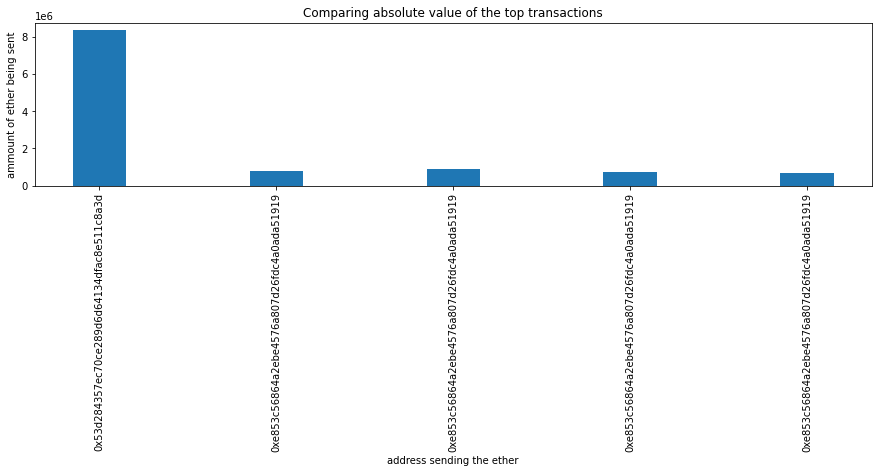

In [26]:
f,a = plt.subplots(figsize=(15,3))
a.set_title('Comparing absolute value of the top transactions')
a.bar(top10txs.from_address, top10txs.ether_value, width=0.3)
#a.bar(top10txs.from_address, top10txs.ether_value, width=0.3)

a.set_xticklabels(top10txs.from_address, rotation=90)
a.set_xlabel("address sending the ether")
a.set_ylabel('ammount of ether being sent')

## 💡 The most valuable transaction moved `8335689` ether
 ***And here's the data on that particular transaction***

In [27]:
txs.loc[1015]

address                               0x53d284357ec70ce289d6d64134dfac8e511c8a3d
eth_balance                                            1378754144654898911481302
hash                           0x1eae6cab215ee3e9194cff64b9bab47f4d0004081c6d...
nonce                                                                          2
transaction_index                                                              2
from_address                          0x53d284357ec70ce289d6d64134dfac8e511c8a3d
to_address                            0x341e790174e3a4d35b65fdc067b6b5634a61caea
value                                                  8335689000000000000000000
gas                                                                       100000
gas_price                                                            24285161958
input                          0x0f2c9329000000000000000000000000e853c56864a2...
receipt_cumulative_gas_used                                               116835
receipt_gas_used            

## Today, 2020-06-05, that much `ether` would represent:
![toptransaction](INPUT/txs_exchange_01.png)



In [28]:
print(f"but back in the day it would be just: {txs.loc[1015].ether_value*Decimal(11.95)}")

but back in the day it would be just: 99611483.54999999407713673349


## ***Nearly 100 million USD***

Now... we'll try to see, since 2019, which of our `from_adress` has the highest number of transactions per month

In [29]:
df = txs[my_columns]
df.head(3)

,block_timestamp,from_address,to_address,ether_value
0,2019-04-28 21:20:31 UTC,0x742d35cc6634c0532925a3b844bc454e4438f44e,0x0cf0ee63788a0849fe5297f3407f701e122cc023,0
1,2019-11-28 21:44:09 UTC,0x742d35cc6634c0532925a3b844bc454e4438f44e,0xdac17f958d2ee523a2206206994597c13d831ec7,0
2,2019-01-20 15:46:09 UTC,0x742d35cc6634c0532925a3b844bc454e4438f44e,0x876eabf441b2ee5b5b0554fd502a8e0600950cfa,50000


In [30]:
df.shape

(50000, 4)

In [31]:
# Make the dataframe a timeseries with a datetime index
df.index = pd.to_datetime(df.block_timestamp)

In [32]:
df=df.loc['2019':]
df

,block_timestamp,from_address,to_address,ether_value
block_timestamp,,,,
2019-04-28 21:20:31+00:00,2019-04-28 21:20:31 UTC,0x742d35cc6634c0532925a3b844bc454e4438f44e,0x0cf0ee63788a0849fe5297f3407f701e122cc023,0
2019-11-28 21:44:09+00:00,2019-11-28 21:44:09 UTC,0x742d35cc6634c0532925a3b844bc454e4438f44e,0xdac17f958d2ee523a2206206994597c13d831ec7,0
2019-01-20 15:46:09+00:00,2019-01-20 15:46:09 UTC,0x742d35cc6634c0532925a3b844bc454e4438f44e,0x876eabf441b2ee5b5b0554fd502a8e0600950cfa,50000
2019-08-07 19:38:04+00:00,2019-08-07 19:38:04 UTC,0x742d35cc6634c0532925a3b844bc454e4438f44e,0xe66747a101bff2dba3697199dcce5b743b454759,0
2019-04-13 14:18:09+00:00,2019-04-13 14:18:09 UTC,0x742d35cc6634c0532925a3b844bc454e4438f44e,0x876eabf441b2ee5b5b0554fd502a8e0600950cfa,50000
...,...,...,...,...
2020-05-22 23:20:42+00:00,2020-05-22 23:20:42 UTC,0xa7efae728d2936e78bda97dc267687568dd593f3,0xabdbba4bc1b993a5ed89057d931e02c661dcfd2b,30
2020-05-22 16:42:40+00:00,2020-05-22 16:42:40 UTC,0xa7efae728d2936e78bda97dc267687568dd593f3,0xe9a428cfdcf3bfefaa81f047529e4bddf058ae65,0.6
2020-05-22 05:53:55+00:00,2020-05-22 05:53:55 UTC,0xa7efae728d2936e78bda97dc267687568dd593f3,0x912cc72659ada24873aea208080dae7b0eb61c4f,4.994


In [33]:
# The wallets for which we will calculate the metric, and how many txs they have performed
wallets = df.from_address.unique()
wallets

for address in wallets:
    total_num_of_txs = df[df.from_address == address].shape[0]
    print(f"{address=} {total_num_of_txs=}")

address='0x742d35cc6634c0532925a3b844bc454e4438f44e' total_num_of_txs=323
address='0xdc76cd25977e0a5ae17155770273ad58648900d3' total_num_of_txs=4
address='0xbe0eb53f46cd790cd13851d5eff43d12404d33e8' total_num_of_txs=403
address='0x66f820a414680b5bcda5eeca5dea238543f42054' total_num_of_txs=51
address='0x267f70f9b856de226fea5fc1b0a8e319c72ceff5' total_num_of_txs=308
address='0x73bceb1cd57c711feac4224d062b0f6ff338501e' total_num_of_txs=11
address='0xe92d1a43df510f82c66382592a047d288f85226f' total_num_of_txs=1
address='0x558553d54183a8542f7832742e7b4ba9c33aa1e6' total_num_of_txs=1
address='0x850c0224f37f67c471e860375ac8e39fea61e8b0' total_num_of_txs=1
address='0xab5801a7d398351b8be11c439e05c5b3259aec9b' total_num_of_txs=3
address='0xca8fa8f0b631ecdb18cda619c4fc9d197c8affca' total_num_of_txs=1
address='0xe0f5b79ef9f748562a21d017bb7a6706954b7585' total_num_of_txs=1
address='0x1e2fcfd26d36183f1a5d90f0e6296915b02bcb40' total_num_of_txs=4
address='0x8103683202aa8da10536036edef04cdd865c225e' tot

## Number of transactions, per wallet, by day of the week

***Coordinated Universal Time (UTC)***

```
 date.isoweekday()

    Return the day of the week as an integer, where Monday is 1 and Sunday is 7
```


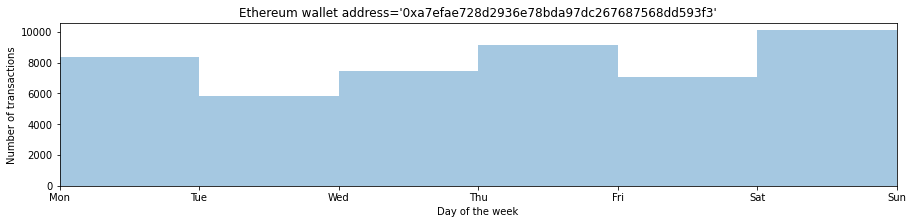

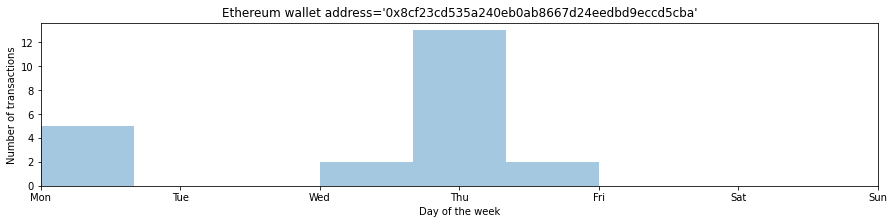

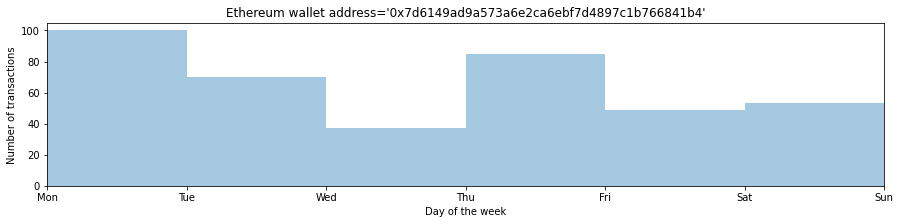

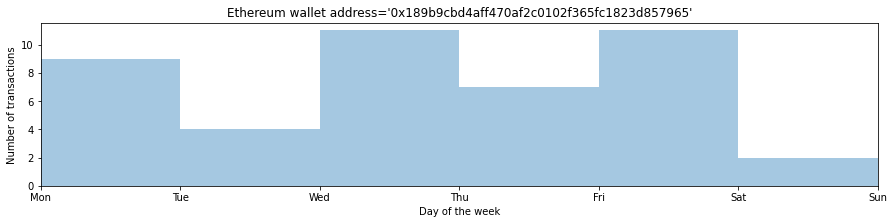

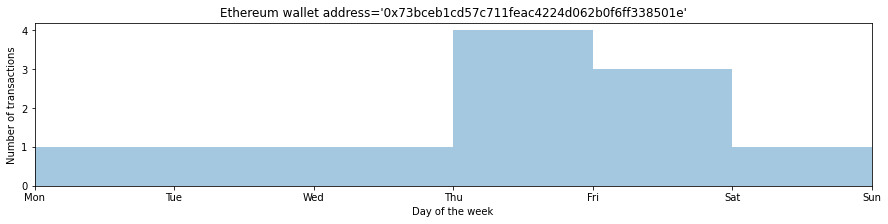

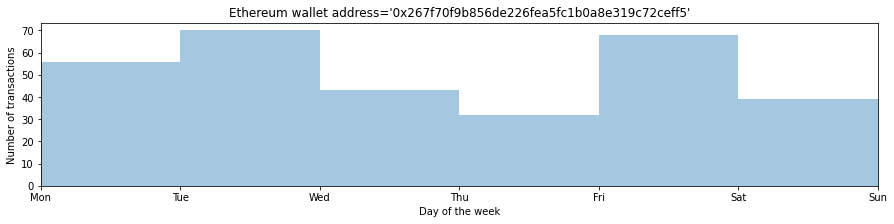

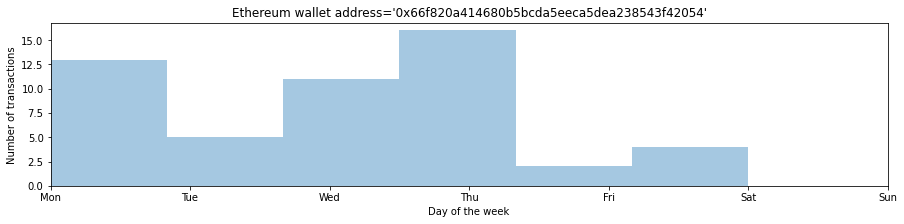

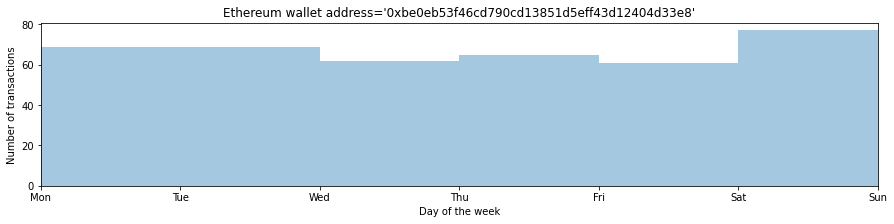

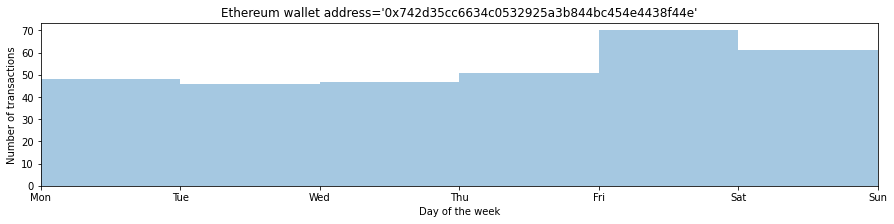

In [34]:
for address in wallets[::-1]:
    #The wallet's transactions
    w_txs=df[df.from_address == address]
    
    # Only take into account the active wallets, with more than 6 txs
    if w_txs.shape[0]>6:
        # Plot the most active days
        f,a = plt.subplots(figsize=(15,3))
        sns.distplot(w_txs.index.weekday, kde=False, bins=6, ax=a).set_title(f'Ethereum wallet {address=}')
        a.set_xticklabels(list(calendar.day_abbr))
        a.set_xlim((0,6))
        a.set_xlabel('Day of the week')
        a.set_ylabel('Number of transactions')

And that concludes this mini-hackathon project for the dOrg member activation proposal.

# Conclusions:

- A copy of the ethereum blockchain can be queried for free using Google's BigQuery
- The `web3` python library can save us time when dealing with data related to ethereum
- Most of the accounts queried from the blockchain hold less than `2000` ether, as of June 4th 2020.
- The most valuable transaction queried moved `8335689` ether @ 2016-07-20 14:42:31 UTC
- The adresses moving the most ethereum are wallets owned by crypto exchanges
- It is possible to see activity of wallets by day of the week

## dOrg is a full-stack freelancer agency building and running on web3.

Check out these links if you want to learn more:
- [dOrg official site](https://dOrg.tech)
- [Blockchain Based LLC](http://legal-engineering.mit.edu/bbllc)
- [DOrg LLC Purports to be First Legally Valid DAO Under US Law](https://cointelegraph.com/news/dorg-llc-purports-to-be-first-legally-valid-dao-under-us-law)
- [dOrg Founders Have Created the First Limited Liability DAO](https://www.coindesk.com/dorg-founders-have-created-the-first-limited-liability-dao)